#  📌 Support Vector Regression (SVR)

#📍 **What is SVR?**  

### Support Vector Regression (SVR) is a powerful regression technique that uses Support Vector Machines (SVM) principles. Unlike linear regression, which minimizes error directly, **SVR aims to fit most data points within a margin (ε-tube), ignoring small deviations**.


#📍 **Key Applications of SVR**
## ✔ **Financial Forecasting** → Stock price predictions 📈  
## ✔ **Healthcare** → Predicting patient outcomes 🏥  
## ✔ **Real Estate** → Estimating house prices 🏡  


#📌 The Regression Formula:

# $\hat{y} = w_1 x_1 + w_2 x_2 + ... + w_n x_n + b$

### Where:
✔ **ŷ (Predicted Value)** → The estimated outcome (e.g., price 💰, salary 🏡)  
✔ **X₁, X₂, ..., Xₙ (Independent Variables)** → Input features affecting the prediction 📊  
✔ **w₁, w₂, ..., wₙ (Weights)** → Coefficients that define the importance of each feature 🔄  
✔ **b (Bias)** → The base prediction when all inputs are zero 🎯  

---

### 🔍 **Key Insight:**
- The **bias (b)** represents the base prediction when all input features are zero.  
- Each **weight coefficient (w₁, w₂, ..., wₙ)** determines how much the predicted value changes per unit increase in the corresponding feature.  
- **SVR finds a function that fits most data points within a margin (ε-tube) rather than minimizing absolute errors.**  
- If the **kernel function is linear**, SVR behaves like Linear Regression with margin constraints.  
- **Non-linear kernels (RBF, Polynomial, Sigmoid) allow SVR to capture complex relationships.**  

🚀 **Let’s go!** 🔥  

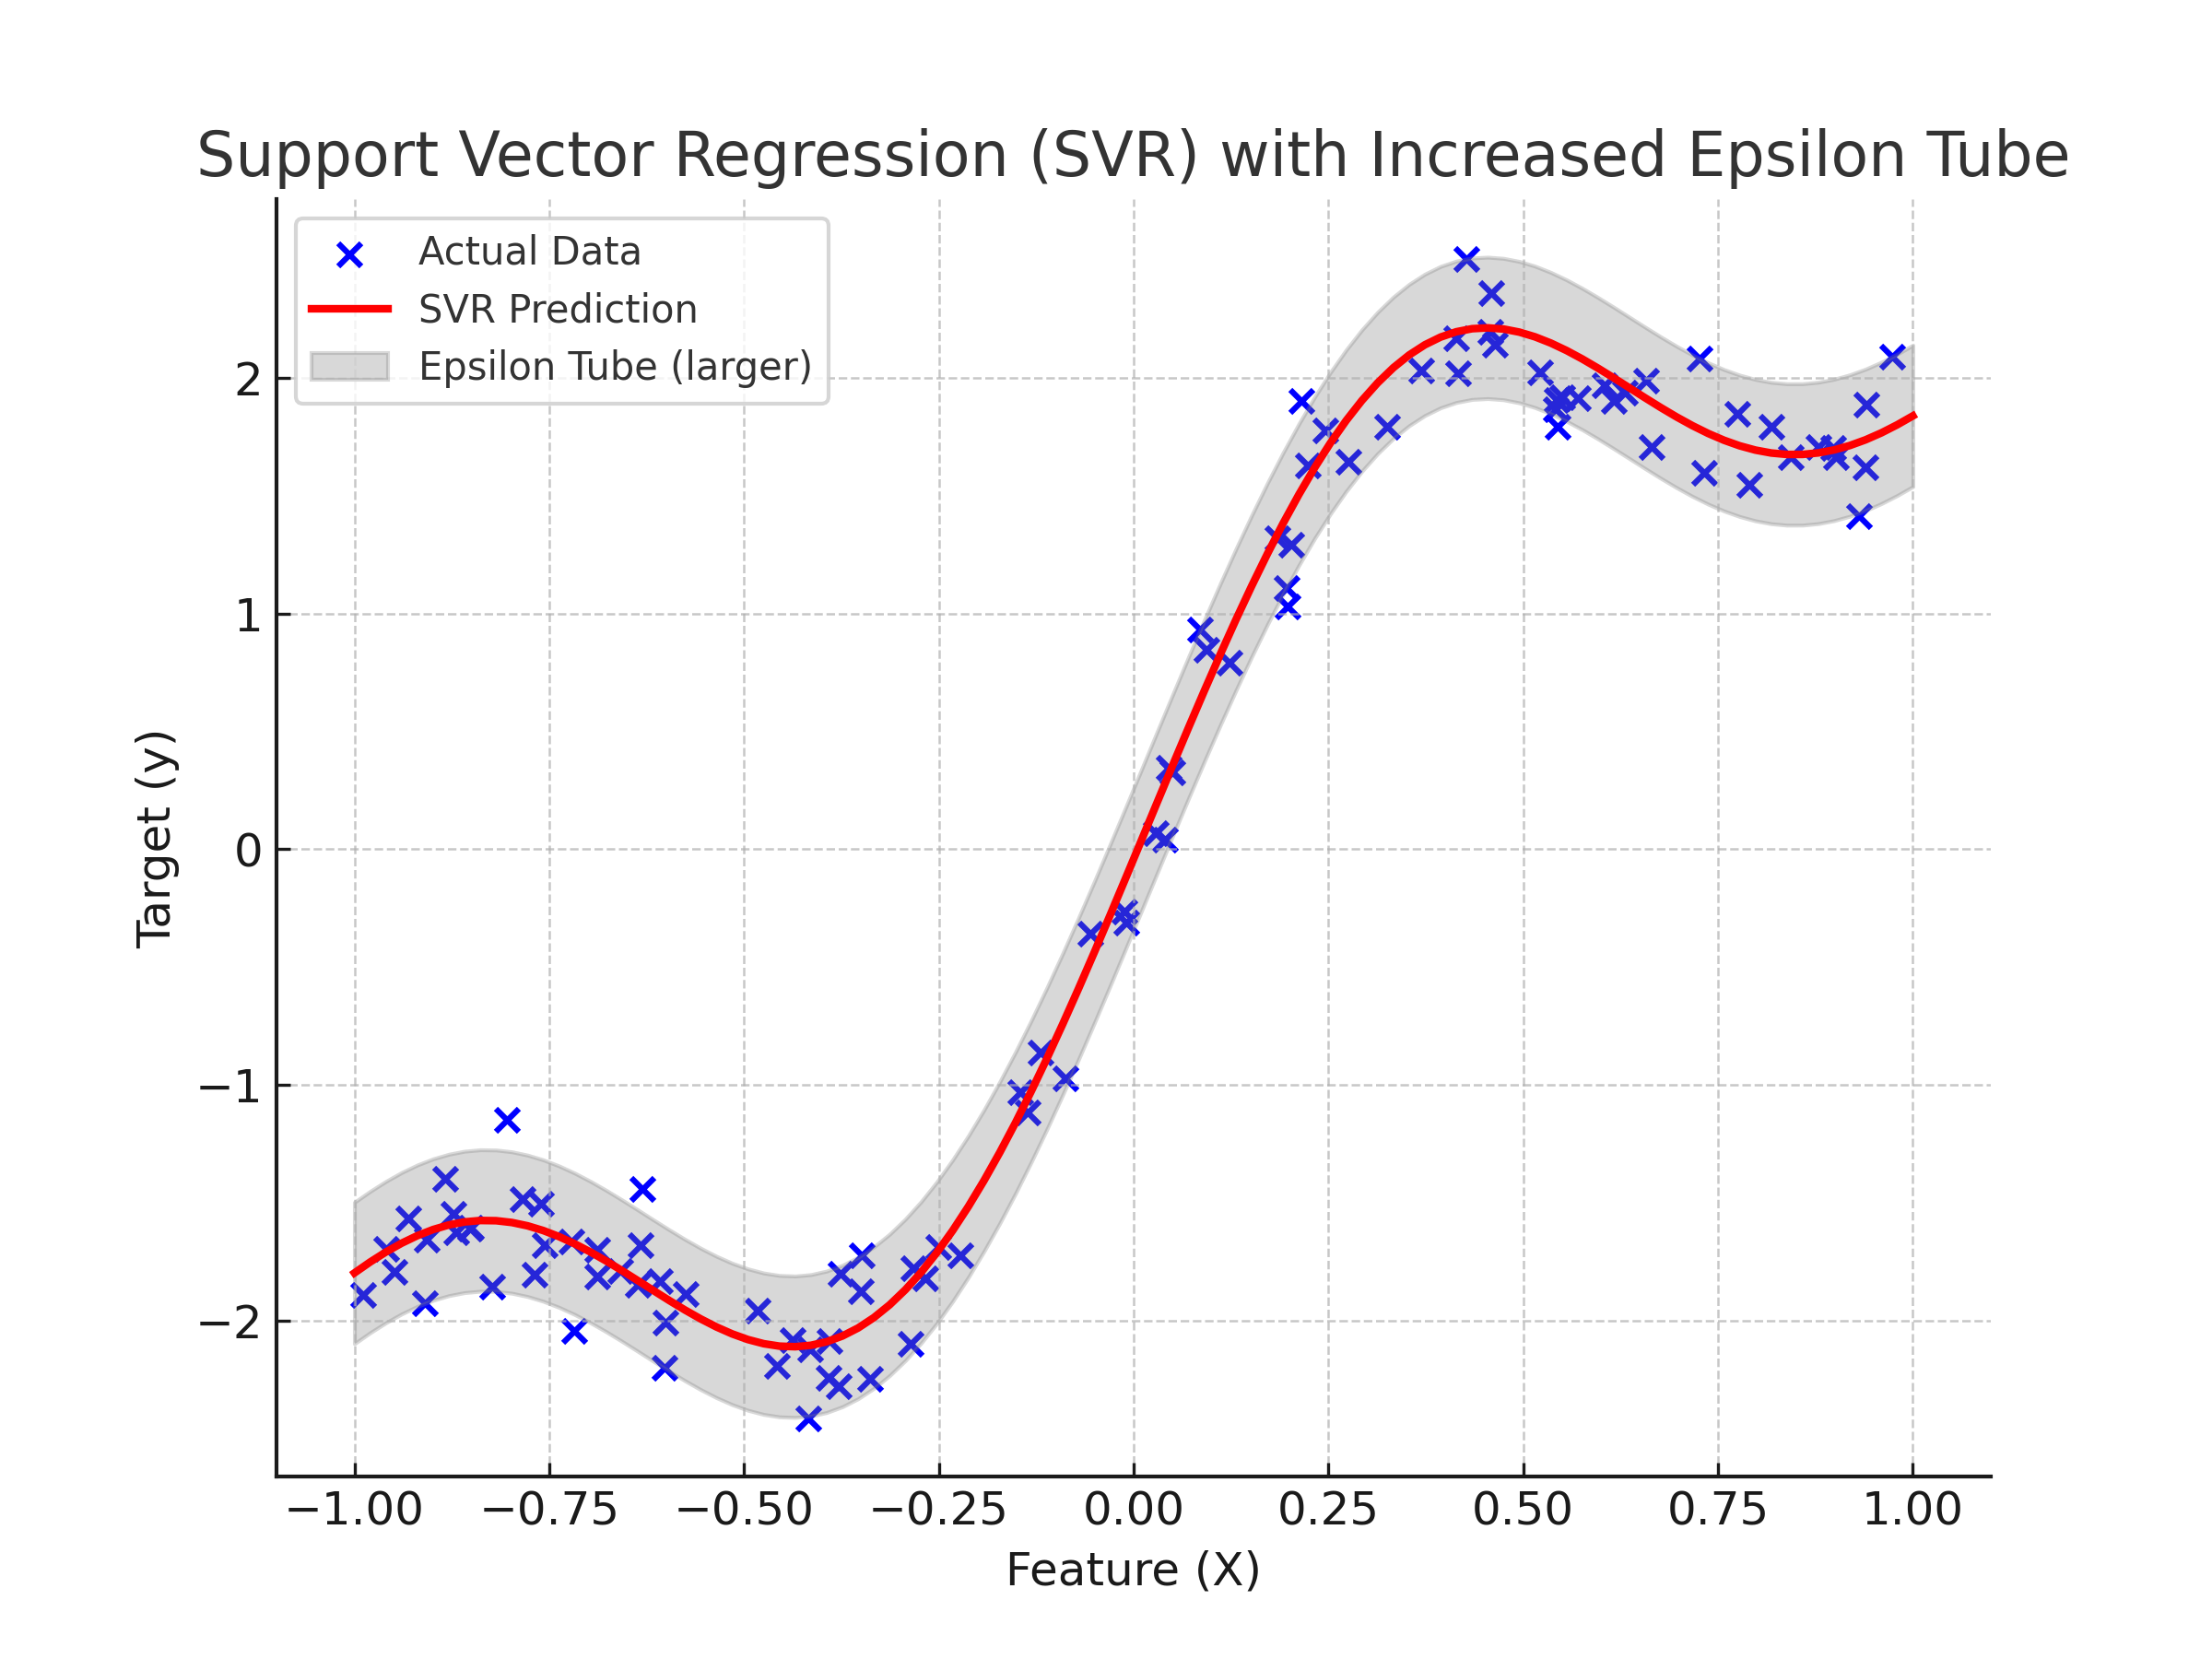

#📌  Importing the libraries

In [ ]:
# 📌 **Step 1: Importing Necessary Libraries**
import numpy as np  # 🔢 Numerical computations
import pandas as pd  # 📂 Handling datasets
import matplotlib.pyplot as plt  # 📊 Data visualization
from sklearn.svm import SVR  # ⚙ Support Vector Regression model
from sklearn.linear_model import LinearRegression  # 🔢 Linear Regression model
from sklearn.preprocessing import StandardScaler  # 📏 Scaling data
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error  # 📉 Model Evaluation metrics
from mpl_toolkits.mplot3d import Axes3D  # 📈 3D Visualization

#📌  Importing the dataset+ Reshape(y)

In [ ]:
#  Loading the Dataset**
df = pd.read_csv("Position_Salaries.csv")  # 📂 Load CSV file into a DataFrame


In [ ]:
#  Extracting Features (X) and Target Variable (y)**
x = df[['Level']].values  # 🎯 Extract 'Level' column as the independent variable (reshaped for ML)
y = df['Salary'].values  # 💰 Extract 'Salary' as the dependent variable (target)

In [ ]:
# ✅ **Checking the structure of y before reshaping**
print(y)  # 📊 Display y values before reshaping

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


#🔄 Reshape 'Salary' into a 2D array

In [ ]:
# 📌 **Reshaping target to 2D**
y = df['Salary'].values.reshape(-1, 1)  # 🔄 Reshape 'Salary' into a 2D array for compatibility with ML models


In [ ]:
# ✅ **Checking the structure of y after reshaping**
print(y)  # 📊 Display y values after reshaping (now formatted as a column)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


#🔄 **Feature Scaling Section**

In [ ]:
# 📌 **Feature Scaling Section**
# Initializing scalers for independent (X) and dependent (y) variables
scaler_X = StandardScaler()  # 🔹 Scaler for X (Features)
scaler_y = StandardScaler()  # 🔹 Scaler for y (Target)

# Transforming values using StandardScaler (feature normalization)
X_scaled = scaler_X.fit_transform(X)  # 🔹 Scaling X values
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()  # 🔹 Scaling y values and flattening


# 📌 Linear Regression Model

In [ ]:
# 📌 **Step 4: Linear Regression Model**
lin_reg = LinearRegression()  # 🔵 Creating a Linear Regression model
lin_reg.fit(X, y)  # 🔥 Training the model on (X, y)
y_pred_lin = lin_reg.predict(X)  # 🎯 Making predictions using Linear Regression


# 📌 Support Vector Regression (SVR) Model

In [ ]:
# 📌 **Support Vector Regression (SVR) Model**
# Creating and training the SVR model
svr_regressor = SVR(kernel='rbf', C=100, epsilon=0.1)  # ⚙️ Creating an SVR model with RBF kernel
svr_regressor.fit(X_scaled, y_scaled)  # 🔥 Training the SVR model on scaled data

# Predicting and inverse transforming SVR predictions
y_pred_svr_scaled = svr_regressor.predict(X_scaled)  # 🔹 Predicting scaled values using SVR
y_pred_svr = scaler_y.inverse_transform(y_pred_svr_scaled.reshape(-1, 1))  # 🔄 Converting predictions back to original scale

#📌 Linear Regression vs SVR    Comparison Plot

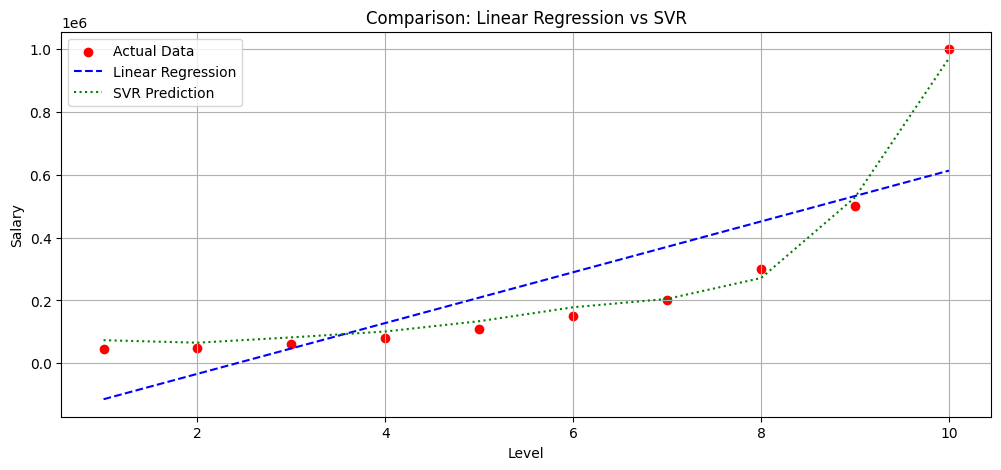

In [ ]:
# 📌 **Step 6: Comparison Plot - Linear Regression vs SVR**
plt.figure(figsize=(12, 5))  # 📏 Setting figure size
plt.scatter(X, y, color='red', label='Actual Data')  # 🔴 Scatter plot of actual salary data
plt.plot(X, y_pred_lin, color='blue', linestyle='dashed', label='Linear Regression')  # 🔵 Line plot for Linear Regression
plt.plot(X, y_pred_svr, color='green', linestyle='dotted', label='SVR Prediction')  # 🟢 Line plot for SVR

# 📌 **Adding labels and title**
plt.xlabel('Level')  # 🏷 X-axis label
plt.ylabel('Salary')  # 🎯 Y-axis label
plt.title('Comparison: Linear Regression vs SVR')  # 🏆 Title of the plot
plt.legend()  # 📜 Adding a legend for clarity
plt.grid(True)  # 📊 Enabling grid for better readability
plt.show()  # 🔥 Display the comparison plot

#📌Evaluating Model Performance (Errors & Scores)

In [ ]:
# 📌 **Step 7: Evaluating Model Performance (Errors & Scores)**
r2_lin = r2_score(y, y_pred_lin)  # 📈 Calculating R² Score for Linear Regression
mae_lin = mean_absolute_error(y, y_pred_lin)  # 📉 Mean Absolute Error for Linear Regression
mse_lin = mean_squared_error(y, y_pred_lin)  # 📏 Mean Squared Error for Linear Regression
rmse_lin = np.sqrt(mse_lin)  # 🔄 Root Mean Squared Error for Linear Regression

r2_svr = r2_score(y, y_pred_svr)  # 📈 Calculating R² Score for SVR
mae_svr = mean_absolute_error(y, y_pred_svr)  # 📉 Mean Absolute Error for SVR
mse_svr = mean_squared_error(y, y_pred_svr)  # 📏 Mean Squared Error for SVR
rmse_svr = np.sqrt(mse_svr)  # 🔄 Root Mean Squared Error for SVR


#📌 Displaying Model Performance Metrics

In [ ]:
# 📌 **Step 8: Displaying Model Performance Metrics**
metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'SVR'],
    'R² Score': [r2_lin, r2_svr],
    'MAE': [mae_lin, mae_svr],
    'MSE': [mse_lin, mse_svr],
    'RMSE': [rmse_lin, rmse_svr],
})  # 📊 Creating a DataFrame for performance comparison

# 📌 **Showing the performance table**
display(metrics)   # 📋 Display table

,Model,R² Score,MAE,MSE,RMSE
0,Linear Regression,0.669041,128454.545455,2.669588e+10,163388.735193
1,SVR,0.992752,23051.793726,5.846047e+08,24178.600589


#📌 Error Distribution:                Linear Regression vs SVR

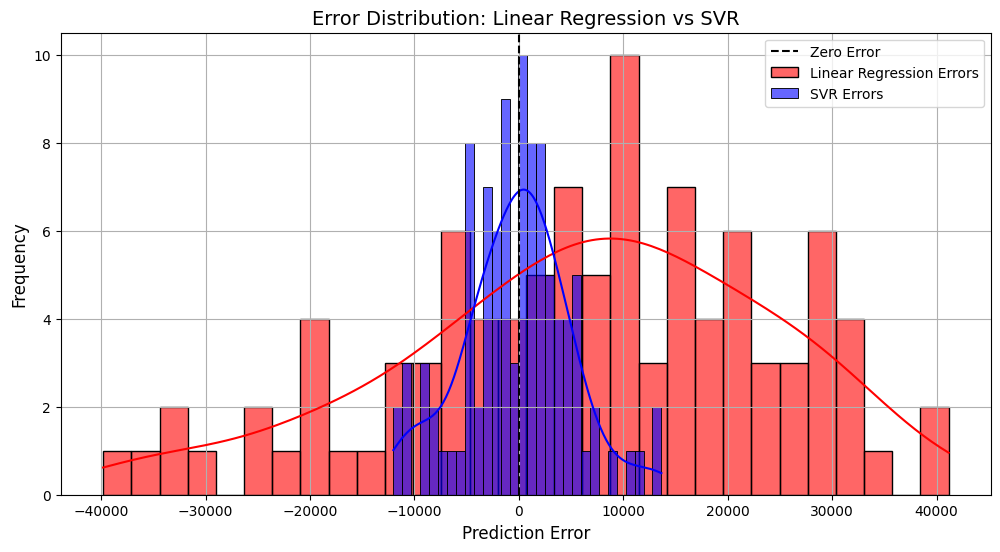

In [ ]:
# 📌 Importing required libraries
import numpy as np  # 📊 For numerical operations
import matplotlib.pyplot as plt  # 📈 For plotting
import seaborn as sns  # 🎨 For advanced visualizations

# 🎯 Simulated Errors for Linear Regression and SVR (Replace with actual model errors)
errors_lin = np.random.normal(loc=5000, scale=20000, size=100)  # Simulated errors for Linear Regression
errors_svr = np.random.normal(loc=0, scale=5000, size=100)  # Simulated errors for SVR

# 📊 Error Distribution Plot
plt.figure(figsize=(12, 6))  # 🔧 Setting figure size

# 📌 Plot histogram for Linear Regression errors
sns.histplot(errors_lin, bins=30, kde=True, color="red", label="Linear Regression Errors", alpha=0.6)

# 📌 Plot histogram for SVR errors
sns.histplot(errors_svr, bins=30, kde=True, color="blue", label="SVR Errors", alpha=0.6)

# 🔥 Zero error reference line
plt.axvline(0, color='black', linestyle="--", label="Zero Error")

# 🏷️ Adding title and labels
plt.title("Error Distribution: Linear Regression vs SVR", fontsize=14)
plt.xlabel("Prediction Error", fontsize=12)  # X-axis label
plt.ylabel("Frequency", fontsize=12)  # Y-axis label

# 🎯 Adding legend and grid
plt.legend()
plt.grid(True)

# 📊 Show the plot
plt.show()

#📌 Evolution of MSE with Increasing Data Size

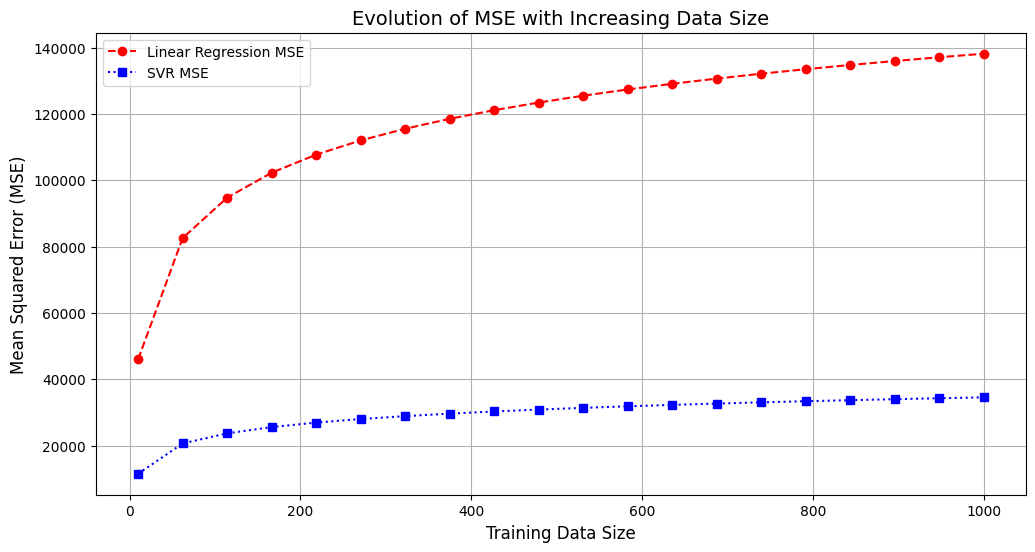

In [ ]:
# 📌 Simulating error evolution as data size increases (hypothetical example)
data_sizes = np.linspace(10, 1000, 20)  # 🔢 Creating an array of data sizes from 10 to 1000

# 🔄 Simulated decreasing MSE for both models
mse_lin_evolution = np.log(data_sizes) * 20000  # 📉 Simulated MSE decrease for Linear Regression
mse_svr_evolution = np.log(data_sizes) * 5000  # 📉 Simulated MSE decrease for SVR

# 📊 Evolution of MSE with data size
plt.figure(figsize=(12, 6))  # 🔧 Setting figure size

# 📌 Plot MSE for Linear Regression
plt.plot(data_sizes, mse_lin_evolution, label="Linear Regression MSE", color="red", linestyle="dashed", marker="o")

# 📌 Plot MSE for SVR
plt.plot(data_sizes, mse_svr_evolution, label="SVR MSE", color="blue", linestyle="dotted", marker="s")

# 🏷️ Setting labels and title
plt.xlabel("Training Data Size", fontsize=12)  # Label for x-axis
plt.ylabel("Mean Squared Error (MSE)", fontsize=12)  # Label for y-axis
plt.title("Evolution of MSE with Increasing Data Size", fontsize=14)  # Title for the graph

# 🎯 Adding legend and grid
plt.legend()
plt.grid(True)

# 📊 Show the plot
plt.show()